In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
# %load_ext autoreload
# %autoreload 2

In [2]:
df = xr.open_dataset('/g/data/w28/nr4680/rainfall_AC_5min.nc')
print(df)

<xarray.Dataset> Size: 2GB
Dimensions:          (site: 90, time: 2525199, nv: 2)
Coordinates:
    latitude         (site) float64 720B ...
    longitude        (site) float64 720B ...
  * time             (time) datetime64[ns] 20MB 2000-01-01T00:05:00 ... 2024-...
Dimensions without coordinates: site, nv
Data variables:
    altitude         (site) float64 720B ...
    rainfall_amount  (time, site) float64 2GB ...
    site_id          (site) |S30 3kB ...
    site_name        (site) |S64 6kB ...
    time_bnd         (time, nv) datetime64[ns] 40MB ...
Attributes:
    MOStools:            vn1.9.1
    sitelist:            Merged
    file_creation_date:  Fri 29 Aug 2025 02:47:09 UT
    history:             Fri Aug 29 02:49:35 2025: ncks -O -4 -L9 --cnk_dmn t...
    NCO:                 netCDF Operators version 5.1.5 (Homepage = http://nc...


In [4]:
def isnancomputesum(x, axis=0):
    """
    Sum along axis, return NaN if all values along that axis are NaN.
    """
    # mask of all-NaN along axis
    allnan = np.all(np.isnan(x), axis=axis)
    # compute nansum
    summed = np.nansum(x, axis=axis)
    # set back to NaN where everything was NaN
    summed = np.where(allnan, np.nan, summed)
    return summed

In [5]:
lentime = df.time.size

In [14]:
0.9*24

21.6

In [8]:
total_record = ((~df.isnull()).sum("time"))/lentime

In [12]:
np.where(total_record.rainfall_amount>0.9)

(array([ 1,  2,  4,  6, 10, 12, 13, 14, 15, 16, 17, 19, 21, 23, 28, 29, 30,
        31, 33, 34, 35, 37, 38, 39, 40, 41, 49, 50, 53, 54, 57, 58, 59, 61,
        71, 73, 75, 76, 77, 83]),)

In [167]:
df.sel(time=slice("2023-02-12", "2023-02-13")).isel(site =0).rainfall_amount.sum(skipna =True)#.plot()

<xarray.DataArray 'rainfall_amount' ()>
array(188.78)
Coordinates:
    latitude   float64 -36.27
    longitude  float64 174.8

In [173]:
akl_ann.isel(site =5)

<xarray.DataArray 'rainfall_amount' ()>
array(nan)
Coordinates:
    latitude   float64 -36.46
    longitude  float64 174.6

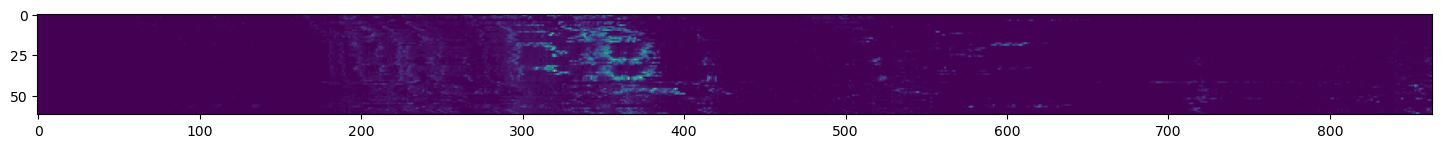

In [176]:
fig, ax = plt.subplots(figsize = (18, 10))
plt.imshow(df.sel(time=slice("2023-01-26", "2023-01-28")).rainfall_amount.dropna("site").values.T)

In [149]:
df.sel(time=slice("2023-01-26", "2023-01-28")).rainfall_amount.dropna("site").values.T.sum(1).min()

47.45

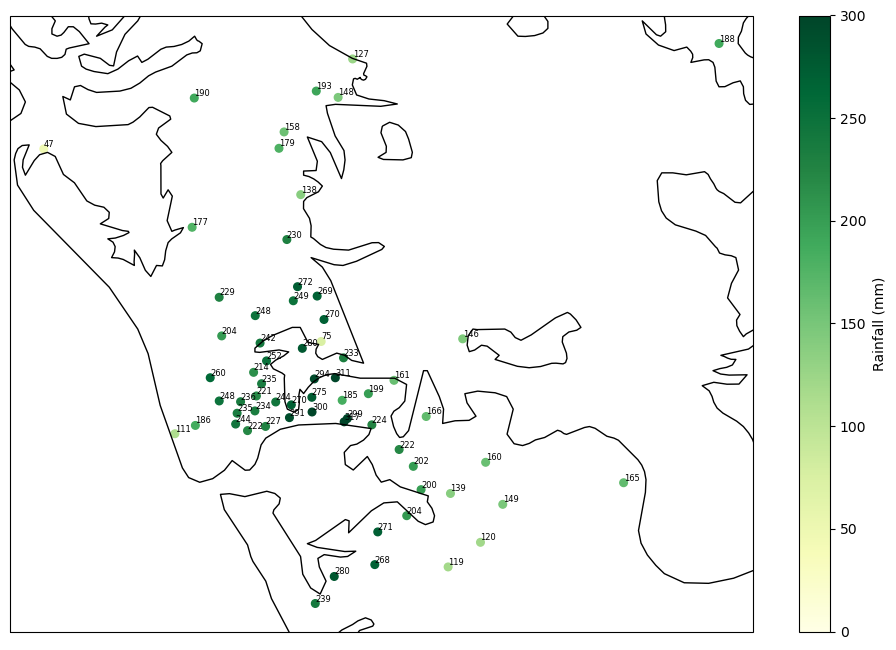

In [179]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
akl_ann = df.sel(time=slice("2023-01-26", "2023-01-28")).rainfall_amount.reduce(isnancomputesum, dim="time")#.sum(dim="time", skipna=True)
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=171.77)), figsize =(12, 8))

sc = ax.scatter(
    akl_ann.dropna("site").longitude, 
    akl_ann.dropna("site").latitude, 
    c=akl_ann.dropna("site").values, 
    s=30, 
    cmap='YlGn', 
    vmin=0, 
    vmax=300, 
    transform=ccrs.PlateCarree()
)

# Add rainfall values as text labels
for lon, lat, rain in zip(akl_ann.dropna("site").longitude, akl_ann.dropna("site").latitude, akl_ann.dropna("site").values):
    ax.text(
        lon, lat, f"{rain:.0f}", 
        transform=ccrs.PlateCarree(),
        fontsize=6, ha='left', va='bottom'
    )

ax.coastlines('10m')
plt.colorbar(sc, ax=ax, label="Rainfall (mm)")
plt.show()


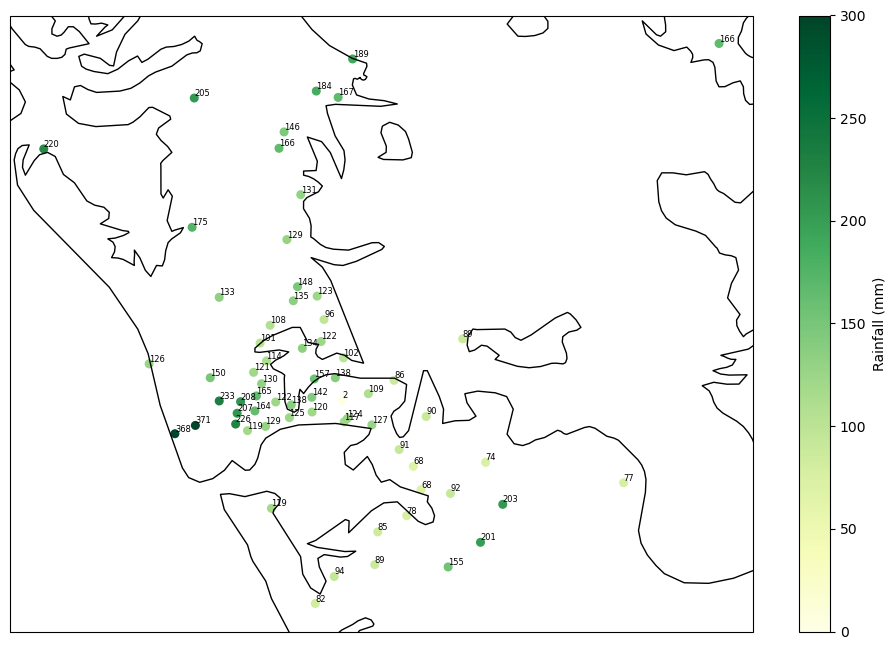

In [180]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
akl_ann = df.sel(time=slice("2023-02-12", "2023-02-13")).rainfall_amount.reduce(isnancomputesum, dim="time")#.sum(dim="time", skipna=True)
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=171.77)), figsize =(12, 8))

sc = ax.scatter(
    akl_ann.dropna("site").longitude, 
    akl_ann.dropna("site").latitude, 
    c=akl_ann.dropna("site").values, 
    s=30, 
    cmap='YlGn', 
    vmin=0, 
    vmax=300, 
    transform=ccrs.PlateCarree()
)

# Add rainfall values as text labels
for lon, lat, rain in zip(akl_ann.dropna("site").longitude, akl_ann.dropna("site").latitude, akl_ann.dropna("site").values):
    ax.text(
        lon, lat, f"{rain:.0f}", 
        transform=ccrs.PlateCarree(),
        fontsize=6, ha='left', va='bottom'
    )

ax.coastlines('10m')
plt.colorbar(sc, ax=ax, label="Rainfall (mm)")
plt.show()


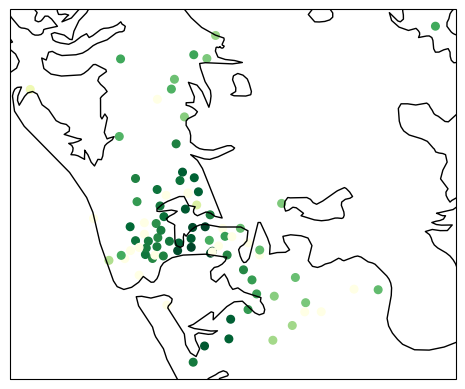

In [110]:
fig, ax = plt.subplots(subplot_kw=dict(projection = ccrs.PlateCarree(central_longitude=171.77)))
ax.scatter(akl_ann.longitude, akl_ann.latitude, c=akl_ann.rainfall_amount, s=30, cmap='YlGn', vmin =0, vmax =300, transform = ccrs.PlateCarree())
ax.coastlines('10m')

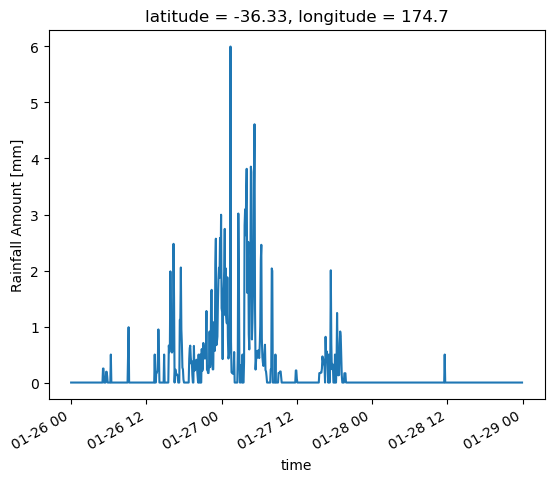

In [89]:
df.sel(time =slice("2023-01-26","2023-01-28" )).rainfall_amount.isel(site =2).plot()

In [3]:
print(df.nbytes/1e9)

1.878758676


In [27]:
df

<xarray.Dataset>
Dimensions:          (site: 90, time: 2525199, nv: 2)
Coordinates:
    latitude         (site) float64 -36.27 -36.34 -36.33 ... -36.92 -37.01 -37.1
    longitude        (site) float64 174.8 174.5 174.7 ... 174.9 174.9 174.9
  * time             (time) datetime64[ns] 2000-01-01T00:05:00 ... 2024-01-03...
Dimensions without coordinates: site, nv
Data variables:
    altitude         (site) float64 ...
    rainfall_amount  (time, site) float64 ...
    site_id          (site) |S30 b'642701' b'643510' ... b'740945' b'741815'
    site_name        (site) |S64 ...
    time_bnd         (time, nv) datetime64[ns] ...
Attributes:
    MOStools:            vn1.9.1
    sitelist:            Merged
    file_creation_date:  Fri 29 Aug 2025 02:47:09 UT
    history:             Fri Aug 29 02:49:35 2025: ncks -O -4 -L9 --cnk_dmn t...
    NCO:                 netCDF Operators version 5.1.5 (Homepage = http://nc...

In [11]:
df.latitude.values

array([-36.269248  , -36.3405    , -36.32776   , -36.33933   ,
       -36.4332    , -36.46300992, -36.4321    , -36.40226   ,
       -36.57603   , -36.51651   , -36.59838   , -36.68427   ,
       -36.70363   , -36.77397   , -36.787     , -36.73706   ,
       -36.70992   , -36.75458   , -36.74905748, -36.78411   ,
       -36.74759   , -36.74407   , -36.79664   , -36.70139   ,
       -36.82491   , -36.87279   , -36.89251   , -36.83802   ,
       -36.8502    , -36.89388   , -36.88341   , -36.84036   ,
       -36.89438   , -36.89958   , -36.81948   , -36.86103   ,
       -36.88585   , -36.88585   , -36.89132   , -36.8503    ,
       -36.81396   , -36.85231   , -36.85529   , -36.87928   ,
       -36.88031582, -36.9532    , -36.94699   , -36.92258333,
       -36.94657   , -36.93464   , -36.91491   , -36.91303   ,
       -36.99748333, -36.9107    , -36.92292   , -36.93677   ,
       -36.93891   , -36.91261   , -36.93055   , -36.92461   ,
       -36.92641111, -36.93602   , -36.90843   , -36.89

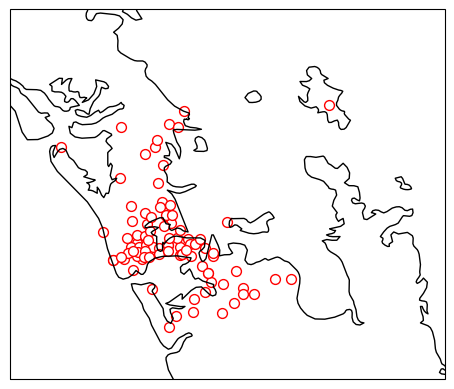

In [26]:
fig, ax = plt.subplots(subplot_kw = dict(projection = ccrs.PlateCarree(central_longitude =171.77)))
ax.scatter(df.longitude.values, df.latitude.values, marker ='o',fc='white', ec='r', s=50,transform = ccrs.PlateCarree())
ax.coastlines('10m')
ax.set_extent([174, 176, -37.5, -35.8], crs = ccrs.PlateCarree())

In [ ]:
annual_max = df.groupby('time.year').max() # 10 minute maximum

In [57]:
monthly_max = df.resample(time ='1H').sum().resample(time ='1MS').max()#groupby('time.year').max()

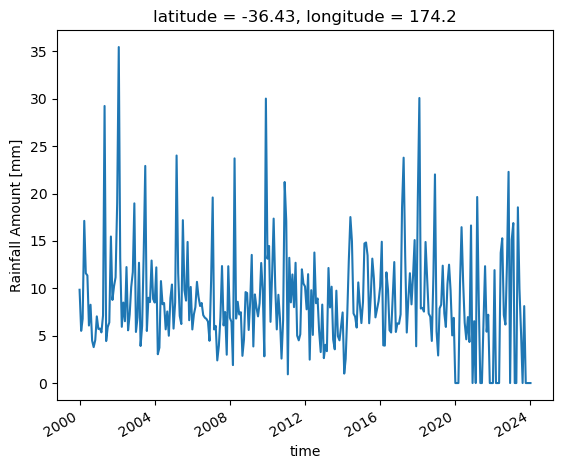

In [188]:
monthly_max.rainfall_amount.isel(site =4).plot()

In [67]:
number_of_non_nan_sites = (~monthly_max.where(monthly_max.rainfall_amount>0.0).isnull()).sum("time")

In [70]:
number_of_non_nan_sites.rainfall_amount/12

<xarray.DataArray 'rainfall_amount' (site: 90)>
array([ 9.08333333, 22.91666667, 22.        ,  7.33333333, 22.33333333,
        1.66666667, 23.25      , 19.58333333, 20.08333333,  9.33333333,
       23.25      , 19.25      , 22.5       , 22.58333333, 22.25      ,
       22.75      , 23.        , 22.58333333,  9.66666667, 23.25      ,
       17.25      , 22.91666667, 21.83333333, 22.16666667,  8.25      ,
       12.91666667, 21.33333333, 12.25      , 23.58333333, 23.08333333,
       22.83333333, 22.5       , 18.        , 22.58333333, 22.83333333,
       23.25      , 10.5       , 22.25      , 22.75      , 22.5       ,
       22.83333333, 22.58333333, 19.58333333,  8.25      , 11.75      ,
       13.41666667, 14.16666667, 18.91666667, 18.91666667, 23.33333333,
       23.5       , 13.08333333, 20.66666667, 23.66666667, 23.        ,
       13.        , 13.58333333, 22.83333333, 22.58333333, 22.08333333,
       17.25      , 22.83333333, 19.75      ,  4.33333333, 16.91666667,
       10.75      , 20.08333333, 18.41666667, 18.5       ,  8.83333333,
       19.66666667, 22.66666667,  7.91666667, 21.91666667,  9.41666667,
       23.25      , 23.        , 23.16666667, 21.25      ,  8.33333333,
        1.66666667,  8.25      , 20.83333333, 22.75      ,  4.16666667,
        4.58333333,  8.        ,  2.33333333,  4.08333333,  6.        ])
Coordinates:
    latitude   (site) float64 -36.27 -36.34 -36.33 ... -36.92 -37.01 -37.1
    longitude  (site) float64 174.8 174.5 174.7 174.8 ... 174.9 174.9 174.9
Dimensions without coordinates: site

In [74]:
monthly_max.site

<xarray.DataArray 'site' (site: 90)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89])
Coordinates:
    latitude   (site) float64 -36.27 -36.34 -36.33 ... -36.92 -37.01 -37.1
    longitude  (site) float64 174.8 174.5 174.7 174.8 ... 174.9 174.9 174.9
Dimensions without coordinates: site

In [75]:
monthly_max.site[np.where(number_of_non_nan_sites.rainfall_amount.values/12 > 21)[0]]

<xarray.DataArray 'site' (site: 43)>
array([ 1,  2,  4,  6, 10, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 26, 28, 29,
       30, 31, 33, 34, 35, 37, 38, 39, 40, 41, 49, 50, 53, 54, 57, 58, 59, 61,
       71, 73, 75, 76, 77, 78, 83])
Coordinates:
    latitude   (site) float64 -36.34 -36.33 -36.43 ... -37.04 -37.04 -36.85
    longitude  (site) float64 174.5 174.7 174.2 174.7 ... 175.3 175.2 174.9
Dimensions without coordinates: site

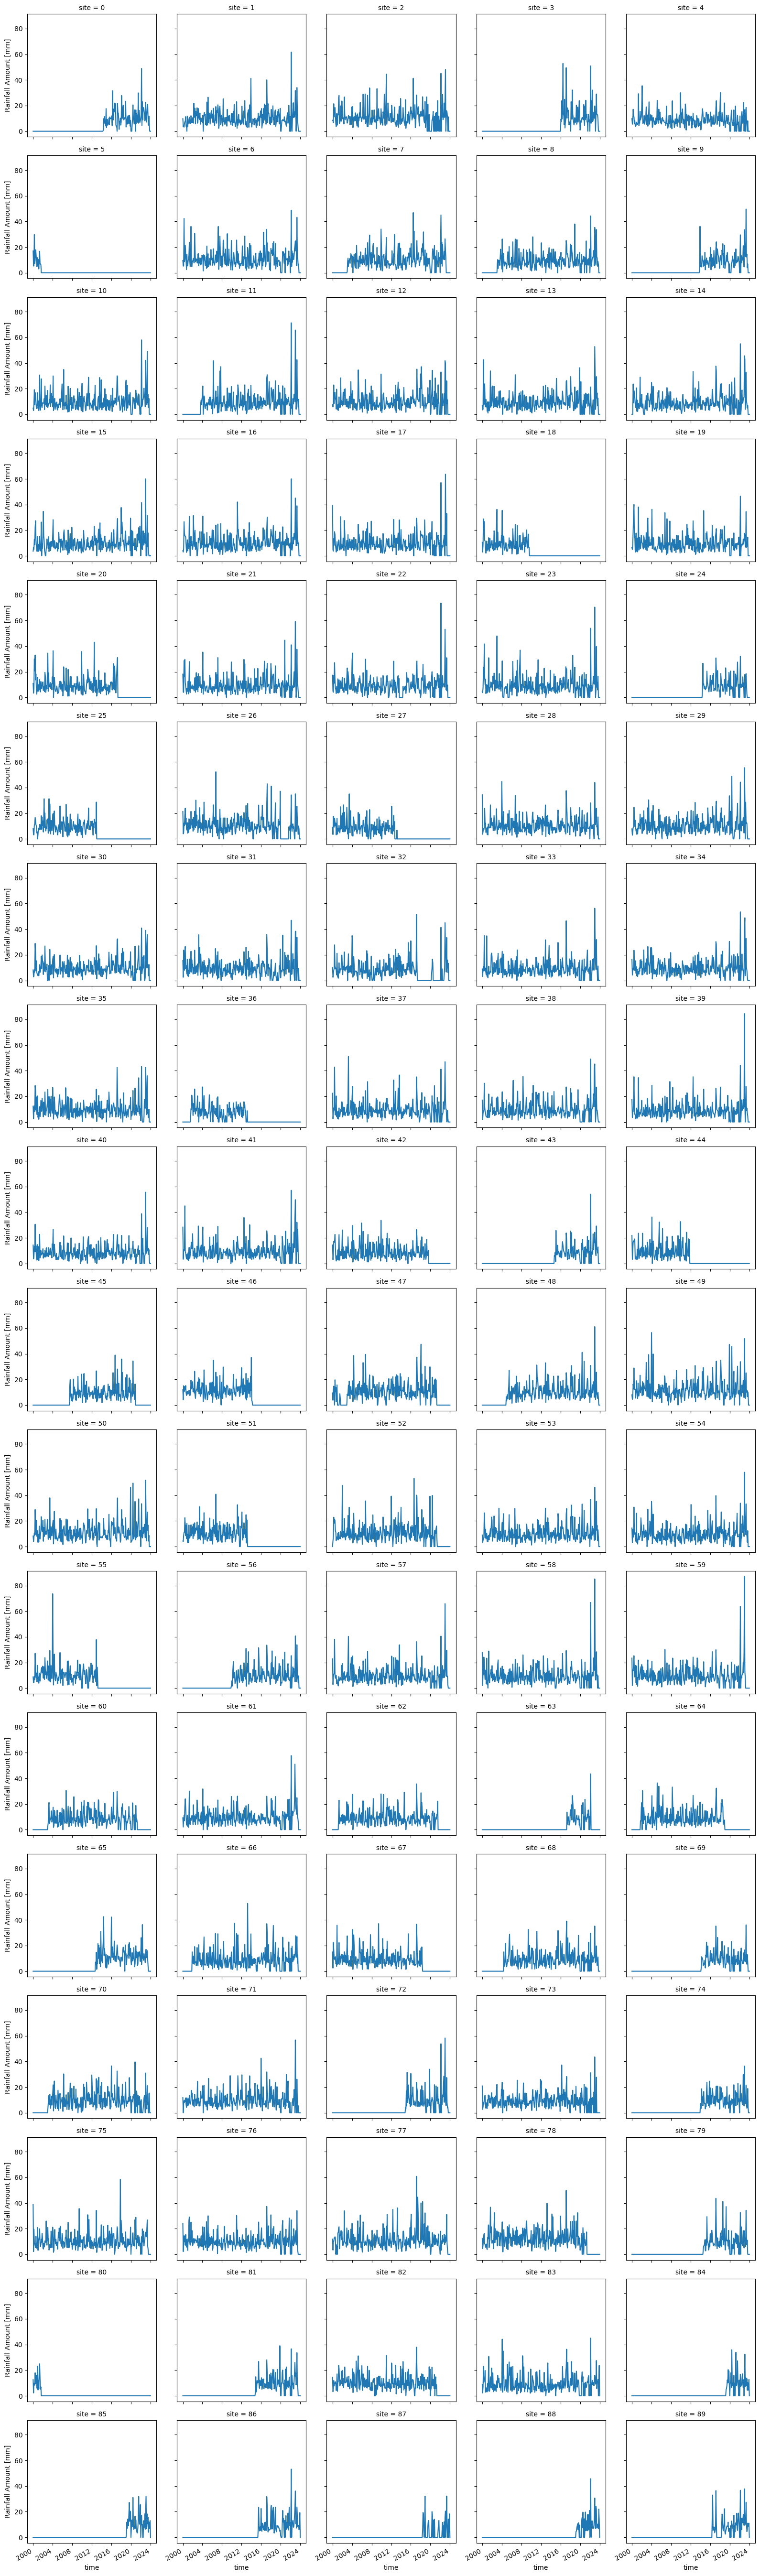

In [63]:
monthly_max.rainfall_amount.plot(col ="site", col_wrap =5)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

# Heatmap
im = ax.imshow(df_array.values, cmap="viridis", aspect="auto")
cbar = plt.colorbar(im, ax=ax, label="Value")

# Add ticks and labels
ax.set_xticks(np.arange(len(df_array.columns)))
ax.set_yticks(np.arange(len(df_array.index)))
ax.set_xticklabels(df_array.columns)
ax.set_yticklabels(df_array.index)

# Rotate x-axis labels if they overlap
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Annotate each cell
for i in range(df_array.shape[0]):       # rows
    for j in range(df_array.shape[1]):   # cols
        ax.text(j, i, f"{df_array.iloc[i, j]:.2f}",
                ha="center", va="center", color="white", fontsize=8)

ax.set_title("Heatmap (Matplotlib only)")
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

# Heatmap
im = ax.imshow(df_array.values, cmap="viridis", aspect="auto")
cbar = plt.colorbar(im, ax=ax, label="Value")

# Add ticks and labels
ax.set_xticks(np.arange(len(df_array.columns)))
ax.set_yticks(np.arange(len(df_array.index)))
ax.set_xticklabels(df_array.columns)
ax.set_yticklabels(df_array.index)

# Rotate x-axis labels if they overlap
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Annotate each cell
for i in range(df_array.shape[0]):       # rows
    for j in range(df_array.shape[1]):   # cols
        ax.text(j, i, f"{df_array.iloc[i, j]:.2f}",
                ha="center", va="center", color="white", fontsize=8)

ax.set_title("Heatmap (Matplotlib only)")
plt.tight_layout()
plt.show()

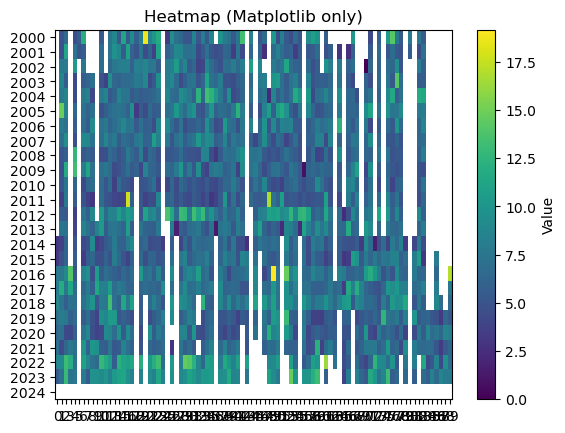

In [ ]:
df_array = annual_max.rainfall_amount.to_pandas()
fig, ax = plt.subplots(figsize = (12, 8))
plt.imshow(df_array.values, cmap="viridis", aspect="auto")
plt.colorbar(label="Value")

# Add ticks and labels
plt.xticks(ticks=np.arange(len(df_array.columns)), labels=df_array.columns)
plt.yticks(ticks=np.arange(len(df_array.index)), labels=df_array.index)


plt.show()

In [52]:
annual_max.rainfall_amount.to_pandas().plot.heatmap()

AttributeError: 'PlotAccessor' object has no attribute 'heatmap'

In [37]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [41]:
(~annual_max.isnull()).sum("year").rainfall_amount.values

array([10, 24, 24,  8, 24,  2, 24, 21, 21, 11, 24, 21, 24, 24, 24, 24, 24,
       24, 10, 24, 18, 24, 24, 24, 10, 13, 23, 14, 24, 24, 24, 24, 21, 24,
       24, 24, 13, 24, 24, 24, 24, 24, 20, 10, 12, 14, 15, 21, 20, 24, 24,
       14, 22, 24, 24, 14, 15, 24, 24, 24, 19, 24, 21,  6, 18, 12, 23, 19,
       20, 10, 22, 24, 10, 24, 10, 24, 24, 24, 22, 10,  2, 10, 22, 24,  5,
        5,  9,  6,  5,  8])

TypeError: Invalid shape (90,) for image data

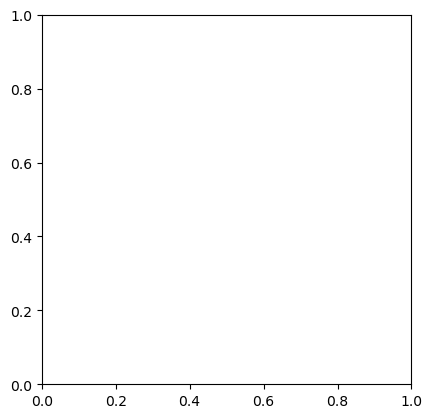

In [40]:
plt.imshow((~annual_max.isnull()).sum("year").rainfall_amount.values)

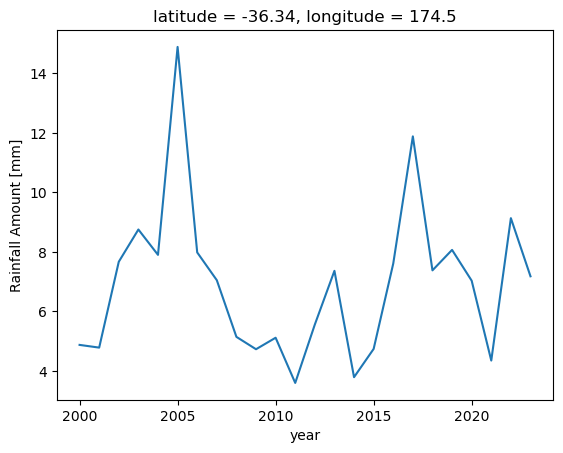

In [32]:
annual_max.rainfall_amount.isel(site =1).plot()

In [6]:
df.site_id.values

array([b'642701', b'643510', b'643713', b'643715', b'644211', b'644614',
       b'644616', b'644626', b'645519', b'645714', b'646619', b'646622',
       b'647510', b'647513', b'647601', b'647614', b'647618', b'647619',
       b'647721', b'647722', b'647727', b'647737', b'647738', b'647739',
       b'648411', b'648510', b'648513', b'648515', b'648516', b'648517',
       b'648612', b'648613', b'648614', b'648615', b'648625', b'648626',
       b'648627', b'648717', b'648718', b'648719', b'648732', b'648733',
       b'648817', b'648825', b'648850', b'649421', b'649509', b'649511',
       b'649514', b'649516', b'649517', b'649518', b'649519', b'649636',
       b'649637', b'649638', b'649641', b'649713', b'649714', b'649723',
       b'649724', b'649818', b'649836', b'649842', b'649937', b'652416',
       b'659401', b'740815', b'740942', b'740944', b'741611', b'741813',
       b'741814', b'742736', b'742739', b'742914', b'750010', b'750213',
       b'750214', b'750301', b'751019', b'751021', 

print(df.nbytes/1e9)

In [2]:
dset_invariant = xr.open_dataset('./ccam_12km_NZ_Invariant.nc') 

In [3]:
dset_invariant.data_vars

Data variables:
    lon_bnds    (lon, bnds) float32 ...
    lat_bnds    (lat, bnds) float32 ...
    depth_bnds  (depth, bnds) float32 ...
    he          (lat, lon) float32 ...
    cor         (lat, lon) float32 ...
    map         (lat, lon) float32 ...
    grid        (lat, lon) float32 ...
    orog        (lat, lon) float32 ...
    vegt        (lat, lon) float32 ...
    sftlf       (lat, lon) float32 ...
    soilt       (lat, lon) float32 ...
    urbant      (lat, lon) float32 ...
    uriver      (lat, lon) float32 ...
    vriver      (lat, lon) float32 ...

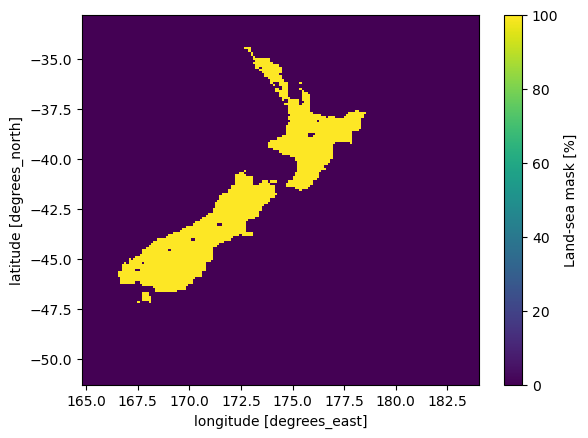

In [4]:
dset_invariant['sftlf'].plot()

In [5]:
mask = dset_invariant['sftlf'].where(dset_invariant['sftlf'] == 100, other=np.nan) - 100 + 1

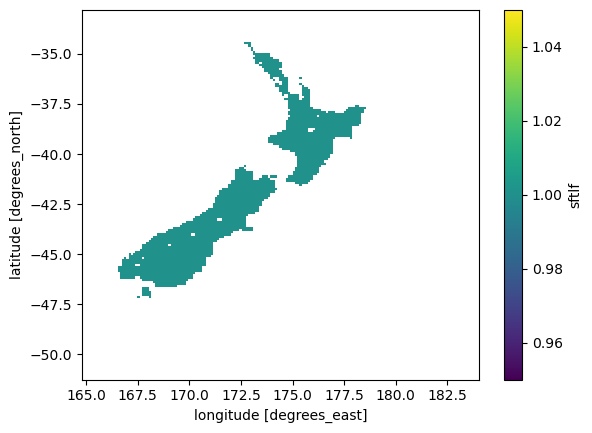

In [6]:
mask.plot()

In [7]:
mask.name = 'mask'

In [8]:
mask.to_netcdf('./ccam_lsmask_12k.nc')

### land sea mask from orography ? 

In [9]:
ccam_mask_12k = dset_invariant['orog'].where(dset_invariant['orog'] >= 0.00001, other=np.NaN)

In [10]:
ccam_mask_12k = (ccam_mask_12k - ccam_mask_12k + 1)

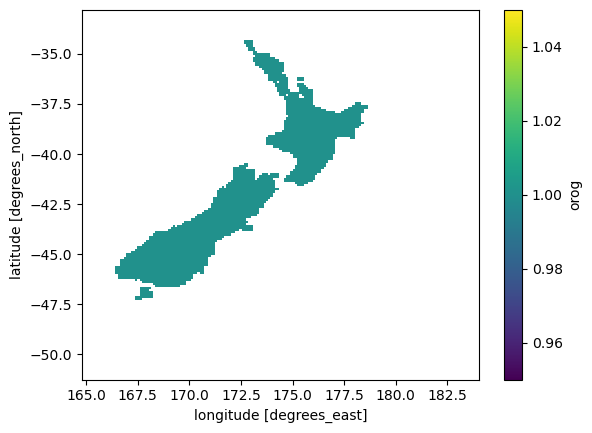

In [11]:
ccam_mask_12k.plot()

In [12]:
ccam_mask_12k.name = 'mask'

In [13]:
# ccam_mask_12k.to_netcdf('./ccam_lsmask_12k.nc')